# Pima Indians Diabetes Database

## This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset

1 Perform Exploratory Data Analysis
2 Extract useful insights about various features in dataset
3 Find if there's any relationship/co relation between any features

*Importing required libraries*

In [784]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import seaborn as sns
import scipy.stats as stat
import pylab

In [785]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [786]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [787]:
df.shape

(768, 9)

In [788]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Checking for missing values 

In [789]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

no missing values found

dropping outcome column as it is categorical

In [790]:
df.drop(['Outcome'],axis = 1,inplace = True)


### plotting box plot for checking for outliers

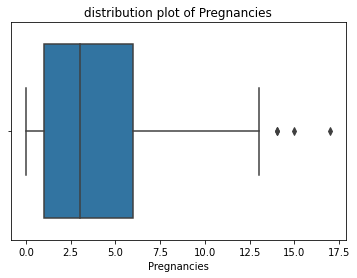

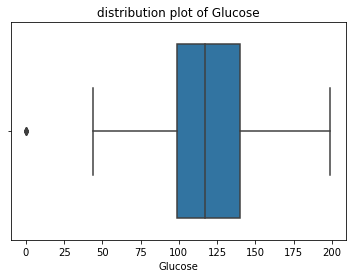

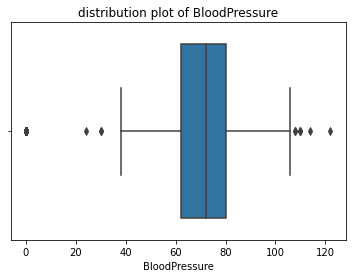

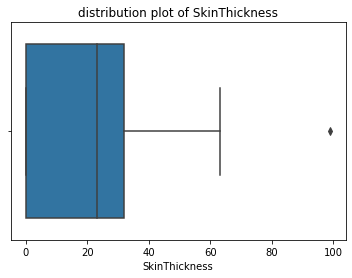

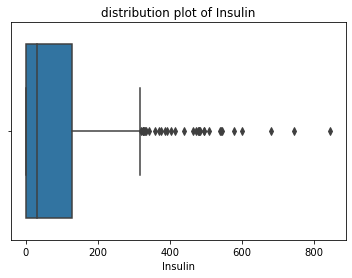

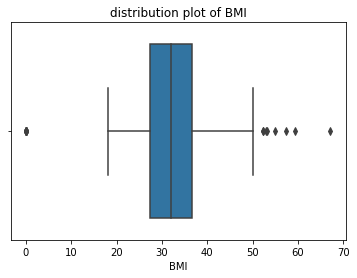

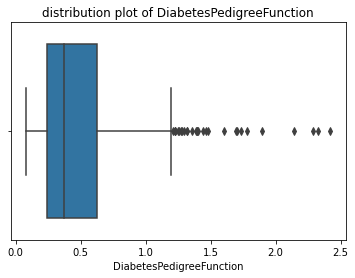

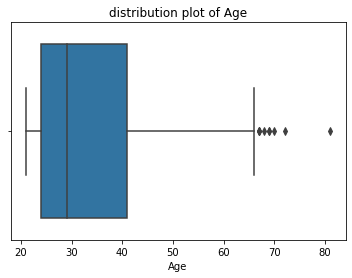

In [791]:
for i,col in enumerate(df.columns):
    plt.figure(i)
    sns.boxplot(x=col, data=df,).set_title("distribution plot of "+col)

There are outliers in most of the columns

### plotting hist plot for checking for skewness

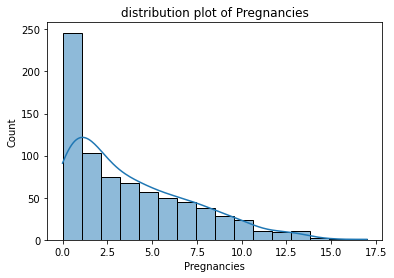

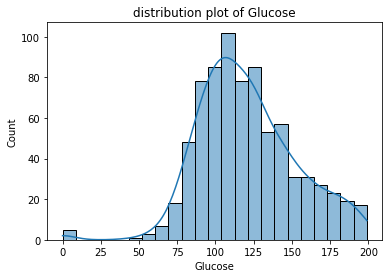

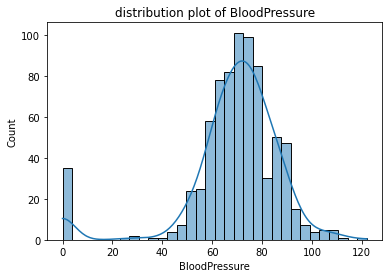

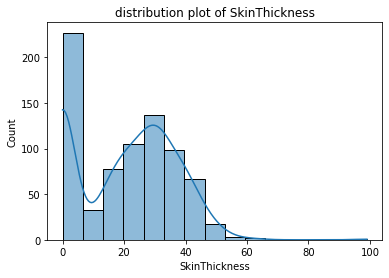

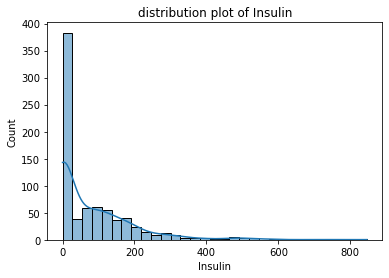

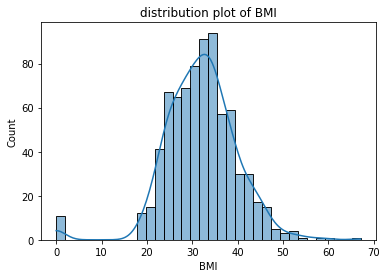

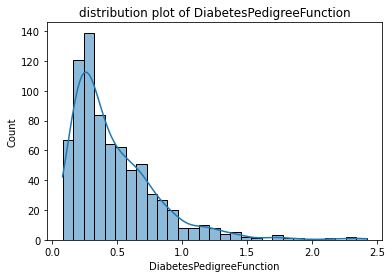

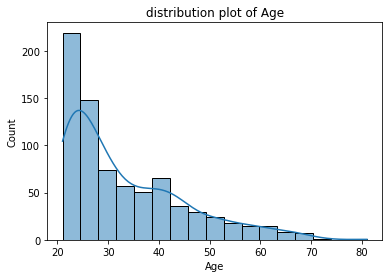

In [792]:
for i,col in enumerate(df.columns):
    plt.figure(i)
    sns.histplot(x=col, data=df,kde = True).set_title("distribution plot of "+col)

we can see that there is high skewness in DiabetesPedigreeFunction ,Insulin,BloodPressure, Age
and moderate skewness in rest

In [793]:
df.skew(axis = 0, skipna = True)

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
dtype: float64

# we are applying required tranformation techinques to reduce the skewness

In [794]:
def plot(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist = 'norm',plot = pylab)
    plt.show()

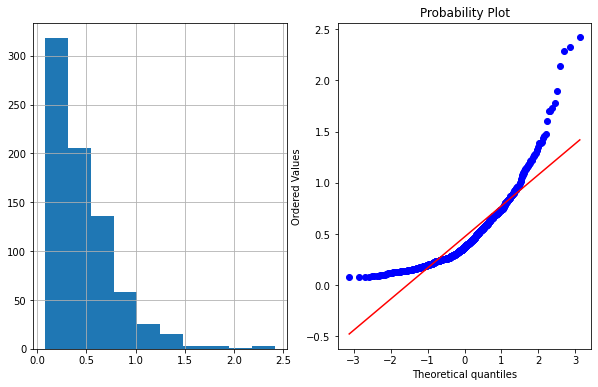

In [795]:
plot(df,'DiabetesPedigreeFunction')


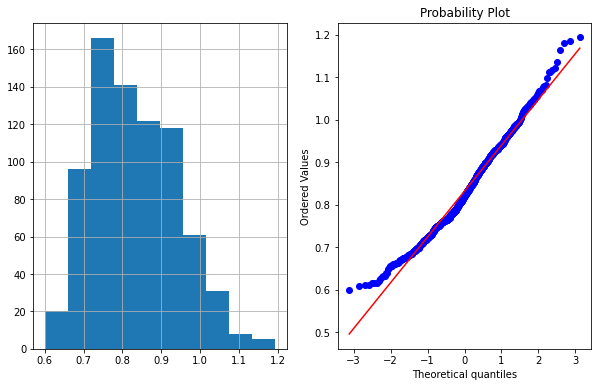

In [796]:
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'] ** (1/5)
plot(df,'DiabetesPedigreeFunction')

In [797]:
df['DiabetesPedigreeFunction'].skew()

0.41271582897431325

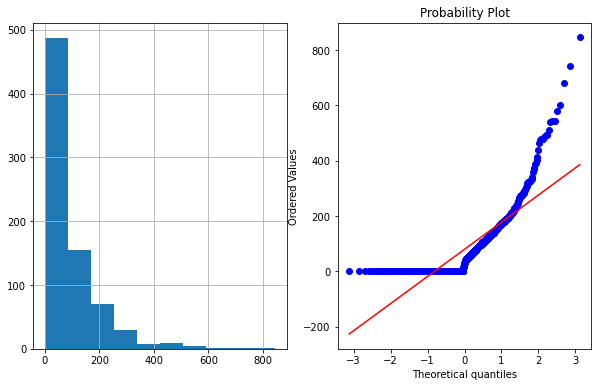

In [798]:
plot(df,'Insulin')

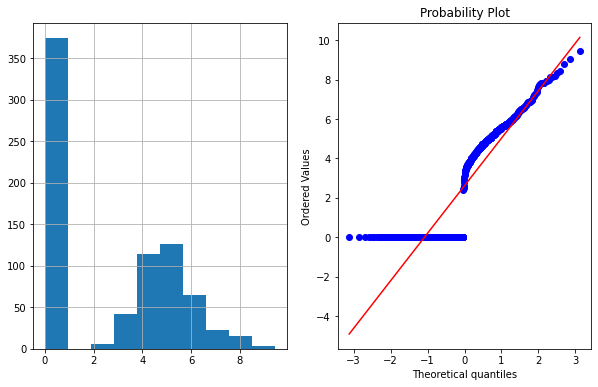

In [799]:
df['Insulin'] = df['Insulin'] ** (1/3)
plot(df,'Insulin')

# Remove outliers 

In [800]:

    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q1 - Q3
    
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    IQR
    
        

Pregnancies                 -5.000000
Glucose                    -41.250000
BloodPressure              -18.000000
SkinThickness              -32.000000
Insulin                     -5.029815
BMI                         -9.300000
DiabetesPedigreeFunction    -0.156616
Age                        -17.000000
dtype: float64

In [801]:
# [(df.BMI < lower_bound)&(df.BMI > upper_bound)]

Correlation

<AxesSubplot:>

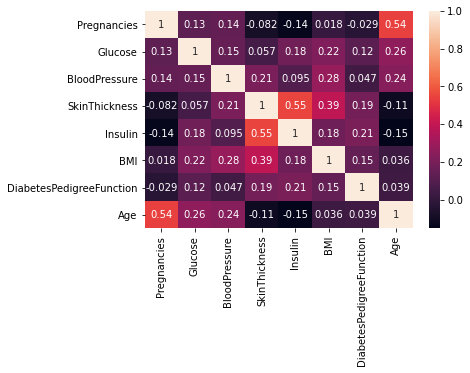

In [802]:
sns.heatmap(df.corr(),annot = True)